# Intro to NLP

This notebook is designed for those of you that don't have a lot of experience with Python and / or building NLP models. Most of the work here will be focused around existing tools and frameworks that we can use to leverage some important topics that we have learned in the course such as word embeddings and simple statistical NLP classifiers.

# 1. Requirements

Run the cell below in order to install the requirements you need for executing the code in this lab session.

In [1]:
!pip install pandas numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: professor2 X.Y.Z has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of professor2 or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# 2. Transforming sentences into representations

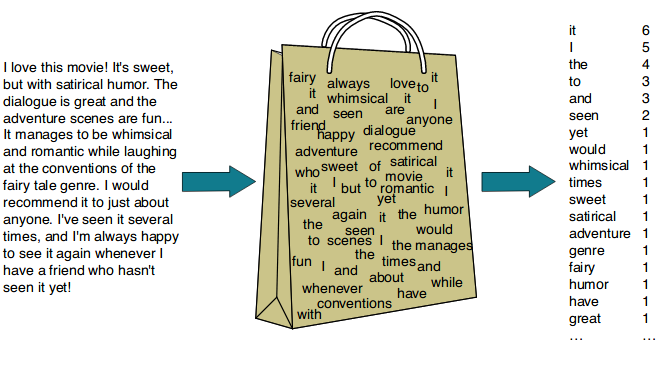

Now, we've seen some examples in the code that allow us to transform . One of the simplest but relatively effective approaches is the [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) model.

Let's build a simple model that allows us to actually build a proper representation of a "corpus" of text. We're given the below sentences:

In [2]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

The goal is to build a class called DocumentBowVectorizer that can take corpus in as an input and then can spit out the representation of any sentence. You'll be offered a couple of test sentences and their expected answer to see that your code actually works well.

Traditionally, the list of documents passed to the vectorizer is called a `corpus` and it provides a method called `fit` usually that takes in the list of documents and builds and internal representation of all words it encounters.

The second method we need to provide is `transform`, that takes in a new sentence and defines a vector for it. In case we've never seen this before, we can simply ignore it.

**Important:** 
You might want to treat uppercase and lowercase words the same way.

For removing punctuation, as it doesn't really encode any information for our use-case, we can use the following function, given `s` is a string:  

```py
sentence.translate(str.maketrans('','',string.punctuation))
```

In [3]:
import string

class DocumentBowVectorizer:
    def __init__(self):
        self.features = [] # will be used to store the word index as it occurs
        
    def _normalize(self, sentence):
        return sentence.translate(str.maketrans('','',string.punctuation)).lower()
    
    def fit(self, data):
        """
        Takes a corpus (a list of sentences) and learns an internal representation
        """
        for sentence in data:
            s = self._normalize(sentence)
            for word in s.split(' '):
                if word not in self.features:
                    self.features.append(word)
        
    def transform(self, sentence):
        """
        Takes a sentence and returns a vector based on the learned vocabulary.
        Returns a vector the length of the vocabulary.
        """
        s = self._normalize(sentence)
        response = [0] * len(self.features)
        for word in s.split(' '):
            if word in self.features:
                response[self.features.index(word)] += 1
        return response


### Challenge time

To see if your implementation is actually good enough, we're going to put it to the test. Let's train a document vectorizer based on what you provided and see if it does the job! Run the code below, it should match the expected output

In [4]:
bow = DocumentBowVectorizer()
bow.fit(corpus)

# The below will throw an exception if your implementation is wrong
assert [1, 1, 1, 0, 2, 1, 0, 1, 0] == bow.transform('this third document is not the second document')
assert ['this', 'is', 'the', 'first', 'document', 'second', 'and', 'third', 'one'] == bow.features

# 3. Spam / not spam classification

Now let's see if our tokenizer is any good, and if it can be used to classify some data. We'll be using a dataset of 5000+ mails classified as spam or not spam.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df = pd.read_csv("./emails.csv", encoding="latin-1")

### Exploratory analysis

Let's do some exploratory data analysis! That way we know what we're jumping into.

In [7]:
df.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [8]:
df.spam.value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: >

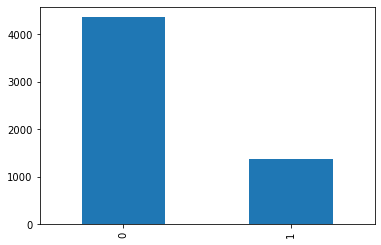

In [9]:
df.spam.value_counts().plot(kind='bar')

### Challenge time!

Try to use our beautiful `DocumentBowVectorizer` in order to fit on the input data. If you're seeing it takes too long, maybe press the stop button and try with a restricted amount of the documents, let's say the first 100 or so.

In [10]:
bow = DocumentBowVectorizer()
bow.fit(df.text[:100])

In [11]:
# Print the features of the BoW vectorizer. What do you see?
# Is there a problem?? 

# YOUR CODE BELOW
print(bow.features)

['subject', 'naturally', 'irresistible', 'your', 'corporate', 'identity', '', 'lt', 'is', 'really', 'hard', 'to', 'recollect', 'a', 'company', 'the', 'market', 'full', 'of', 'suqgestions', 'and', 'information', 'isoverwhelminq', 'but', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'will', 'make', 'task', 'much', 'easier', 'we', 'do', 'not', 'promise', 'that', 'havinq', 'ordered', 'iogo', 'automaticaily', 'become', 'world', 'ieader', 'it', 'isguite', 'ciear', 'without', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'be', 'hotat', 'nowadays', 'marketing', 'efforts', 'more', 'here', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'image', 'convenience', 'stationery', 'are', 'provided', 'in', 'all', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'even', 'its', 'structure', 'promptness', 'you', 'see', 'drafts', 'withi

### Bummer!

Well obviously this became a trickier problem the moment we started having too many words in our corpus! 

Luckily, some people that had more time than us thought about some smarter implementations. We can take a look at the amazing scikit-learn library, that allows us to 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  -----

These following pieces of information are pretty crucial as to why this might work better:

>  |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 
 

### Classifier training 101

If you're new to this, you need to understand how to train your classifier. One very useful tool is splitting your data into training and testing data, stuff you train on and stuff you look at for the first time to see if your ML model actually works for anything more than your spoon-fed examples.



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

train_X, test_X, train_y, test_y = train_test_split(df["text"],df["spam"], test_size=0.2, random_state=10)

In [14]:
vect = CountVectorizer(stop_words="english")
vect.fit(train_X) 

CountVectorizer(stop_words='english')

In [15]:
print(vect.get_feature_names_out()[:20]) # gets the first 20 features
print(vect.get_feature_names_out()[-20:]) # gets the last 20 features

['00' '000' '0000' '00000000' '000000000003619' '000000000003991'
 '000000000003997' '000000000005168' '000000000005411' '000000000005413'
 '000000000005820' '000000000006238' '000000000007494' '000000000007498'
 '000000000007876' '000000000010552' '000000000011185' '000000000012677'
 '000000000012735' '000000000012736']
['zunaechst' 'zunf' 'zur' 'zurich' 'zusaetzlich' 'zuzana' 'zwabic'
 'zwischen' 'zwlaszcza' 'zwrocic' 'zwwyw' 'zwzm' 'zxghlajf' 'zyban' 'zyc'
 'zygoma' 'zymg' 'zzn' 'zzncacst' 'zzzz']


In [16]:
X_train_df = vect.transform(train_X)
X_test_df = vect.transform(test_X)
type(X_test_df)

scipy.sparse._csr.csr_matrix

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = MultinomialNB(alpha=1.8)
model.fit(X_train_df,train_y)
pred = model.predict(X_test_df)
accuracy_score(test_y, pred)

0.9947643979057592

In [18]:
print(classification_report(test_y, pred , target_names = ["Not Spam", "Spam"]))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       861
        Spam       1.00      0.98      0.99       285

    accuracy                           0.99      1146
   macro avg       1.00      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



### Let's see how this fares on some of the actual data


In [19]:

print(df["text"][1472])
pred = model.predict(vect.transform(df["text"]))
print("Pred : ",pred[1472])
print("Main : ",df["spam"][1472])

Subject: meeting with bob butts  this is scheduled for 2 pm on thursday 27 th in his office ebl 906 . you are  welcome to join . i will give a overview of what we ( sandeep & co ) are trying  to do for dpc ( dabhol power ) and ask him to clarify the mark - to - market issues  related to those deals .  krishna .
Pred :  0
Main :  0


In [20]:
print(df["text"][10])
pred = model.predict(vect.transform(df["text"]))
print("Pred : ",pred[10])
print("Main : ",df["spam"][10])

Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . 
Pred :  1
Main :  1


The below should print **spam**

In [21]:
pred = model.predict(vect.transform(["buy now you're sure to become rich from this amazing offer, just click on this link and all your dreams will come true"]))
print(f"Prediction: {'spam' if pred[0] == 1 else 'not spam'}")

Prediction: spam


# 4. Bonus: Using TF-IDF in order to get better predictions

Or will they really be like that? Let's try to compare the two approaches. TF-IDF should capture more meaning, so more is better right? We'll be looking at two separet implementations.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

Let's compare the two vectorizers by making use of the nifty [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) function in sklearn.

This allows us to define several steps in our process so we don't need to worry about fitting the models individually.

In [23]:
from sklearn.pipeline import make_pipeline
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_count = make_pipeline(CountVectorizer(), MultinomialNB())

In [24]:
model_tfidf.fit(train_X, train_y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [25]:
model_count.fit(train_X, train_y)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [26]:
y_pred_tfidf = model_tfidf.predict(test_X)
y_pred_count = model_count.predict(test_X)

### It's all about metrics
Well now that we've done our predictions, let's see what's going on!

Maybe something interesting happened (or maybe not).

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

accuracy = accuracy_score(test_y, y_pred_tfidf)
f1 = f1_score(test_y, y_pred_tfidf, average='weighted')

print('Multinomial Naive Bayes with TF-IDF:')
print('-' * 40)
print(f'f1: {f1:.4f}')
print(f'accuracy: {accuracy:.4f}')

accuracy = accuracy_score(test_y, y_pred_count)
f1 = f1_score(test_y, y_pred_count, average='weighted')

print('----')
print('Multinomial Naive Bayes with Count vectorizer:')
print('-' * 40)
print(f'f1: {f1:.4f}')
print(f'accuracy: {accuracy:.4f}')

Multinomial Naive Bayes with TF-IDF:
----------------------------------------
f1: 0.8427
accuracy: 0.8630
----
Multinomial Naive Bayes with Count vectorizer:
----------------------------------------
f1: 0.9921
accuracy: 0.9921


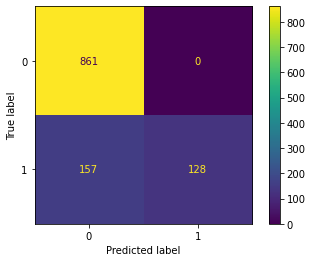

In [28]:
cm = confusion_matrix(test_y, y_pred_tfidf, labels=model_tfidf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_tfidf.classes_)
disp.plot()

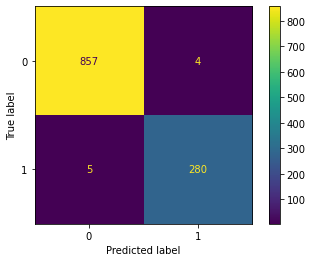

In [29]:
cm = confusion_matrix(test_y, y_pred_count, labels=model_count.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_count.classes_)
disp.plot()

### What conclusions can we draw from this?

Is TF-IDF that much worse, or do you think there's something else at play? Formulate your own hypothesis.